In [14]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#데이터 시각화 + 패키지
import seaborn as sns
#통계 분석 패키지
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
#그래프 표시
%matplotlib inline
#선형 회귀분석모델 formula(y ~ X1 + X2 +)
import statsmodels.formula.api as smf
#회귀분석의 정규성 확인
from statsmodels.api import qqplot,add_constant
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#학습용과 평가용 데이터 분리
from sklearn.model_selection import train_test_split
#선형회귀모형 
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
#평가함수
from sklearn.metrics import r2_score

matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

#릿지 사용
from sklearn.linear_model import Ridge

#라쏘 사용
from sklearn.linear_model import Lasso 

#엘라스틱넷 사용
from sklearn.linear_model import ElasticNet 

#graphviz : 나무 구조 시각화 및 의사결정나무
import graphviz 

from sklearn.tree import DecisionTreeRegressor, export_graphviz

#예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 예측/회귀 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

In [15]:
matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

In [16]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/Concrete.csv",encoding = 'euc-kr')
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [17]:
df_raw_y = df_raw["strength"]
df_raw_x = df_raw.drop("strength",axis = 1, inplace = False)
df_raw

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [18]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}". format(df_train_x.shape))
print("train data T size : {}". format(df_train_y.shape))
print("test data X size : {}". format(df_test_x.shape))
print("test data Y size : {}". format(df_test_y.shape))
df_raw

train data X size : (618, 8)
train data T size : (618,)
test data X size : (412, 8)
test data Y size : (412,)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [19]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))
# 랜덤 포레스트 또한 과대적합 의심됨.

Score on training set: 0.980
Score on test set: 0.904


In [20]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [22]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators , random_state = 1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

In [23]:
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["Trainscore"] = train_score
df_score_n["Testscore"] = test_score

In [24]:
df_score_n.round(3) # esti는 60이후로는 아무 변화가 없으므로 60으로 설정

,n_estimators,Trainscore,Testscore
0,10,0.973,0.905
1,20,0.978,0.905
2,30,0.979,0.903
3,40,0.979,0.905
4,50,0.980,0.905
5,60,0.980,0.906
6,70,0.980,0.906
7,80,0.980,0.906
8,90,0.980,0.905
9,100,0.980,0.904


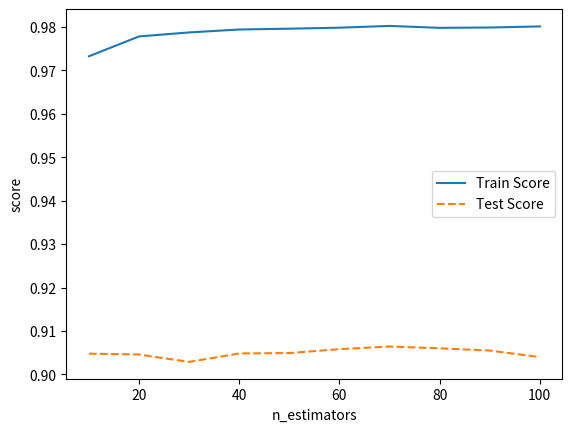

In [25]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend() # 60 선택

In [26]:
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 60, 
                               min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

In [27]:
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["Trainscore"] = train_score
df_score_leaf["Testscore"] = test_score

In [28]:
df_score_leaf.round(3) # leaf는 4개 이후로는 계속 스코어가 떨어지고 있기 때문에 4개를 설정

,MinSamplesLeaf,Trainscore,Testscore
0,1,0.980,0.906
1,2,0.967,0.900
2,3,0.952,0.892
3,4,0.939,0.880
4,5,0.925,0.871
5,6,0.913,0.859
6,7,0.903,0.851
7,8,0.895,0.846
8,9,0.886,0.837
9,10,0.877,0.825


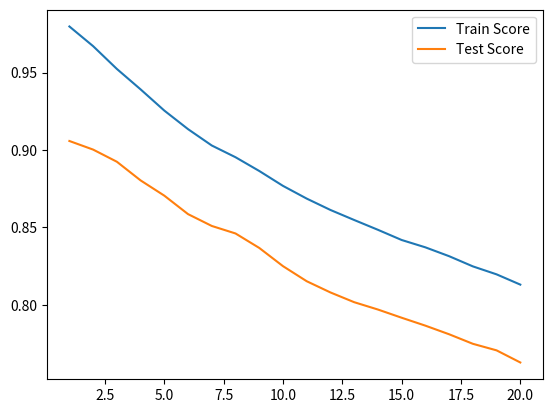

In [29]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "-", label = "Test Score")
plt.legend()

In [30]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 60 ,min_samples_leaf = 4
                                 , min_samples_split = v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

In [31]:
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["Trainscore"] = train_score
df_score_split["Testscore"] = test_score

In [32]:
df_score_split.round(3) # 8이후로 변화가 있고 10 이하의 수를 선택하면 모델이 너무 단순해질 것 같기 때문에 10 선택

,MinSamplesLeaf,Trainscore,Testscore
0,2,0.939,0.880
1,4,0.939,0.880
2,6,0.939,0.880
3,8,0.939,0.880
4,10,0.933,0.876
5,12,0.926,0.871
6,14,0.918,0.865
7,16,0.912,0.860
8,18,0.905,0.854
9,20,0.897,0.846


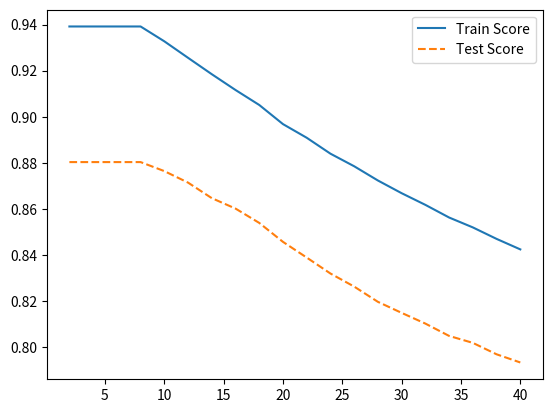

In [33]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [34]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 130, min_samples_leaf = 7, min_samples_split = 20,
                                max_depth = v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
                       
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [35]:
df_score_depth.round(3) # testscore가 가장 높은 7를 선택

,Depth,TrainScore,TestScore
0,1,0.339,0.332
1,2,0.618,0.596
2,3,0.741,0.701
3,4,0.814,0.772
4,5,0.862,0.818
5,6,0.881,0.835
6,7,0.887,0.839
7,8,0.889,0.841
8,9,0.890,0.841
9,10,0.890,0.841


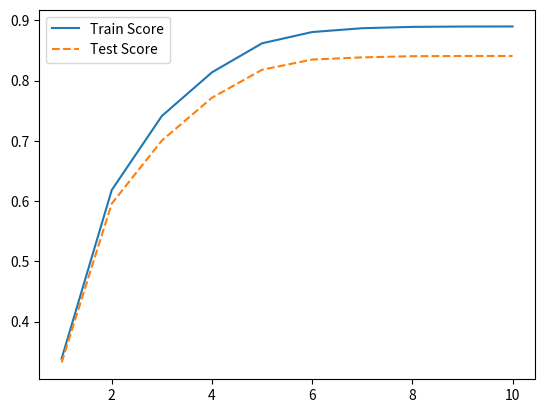

In [36]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [51]:
rf_final = RandomForestRegressor(random_state = 1234,n_estimators = 60, min_samples_leaf = 4, min_samples_split = 10, max_depth = 7)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
# 모델이 training set에 과대적합되어있기 때문에 복잡성을 줄일 필요가 있어 보임

Score on training set: 0.922
Score on test set: 0.869


In [52]:
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 369     15.34
544     14.60
500     57.92
199     15.04
262     44.40
1002    57.22
679     33.00
330     42.22
477     23.35
405     69.84
Name: strength, dtype: float64
test data의 예측값 : 
 [20.23561814 15.40058198 52.35027632 14.08466575 44.71610959 48.99235064
 32.1210948  32.34025046 33.68344999 64.42910981]


In [53]:
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

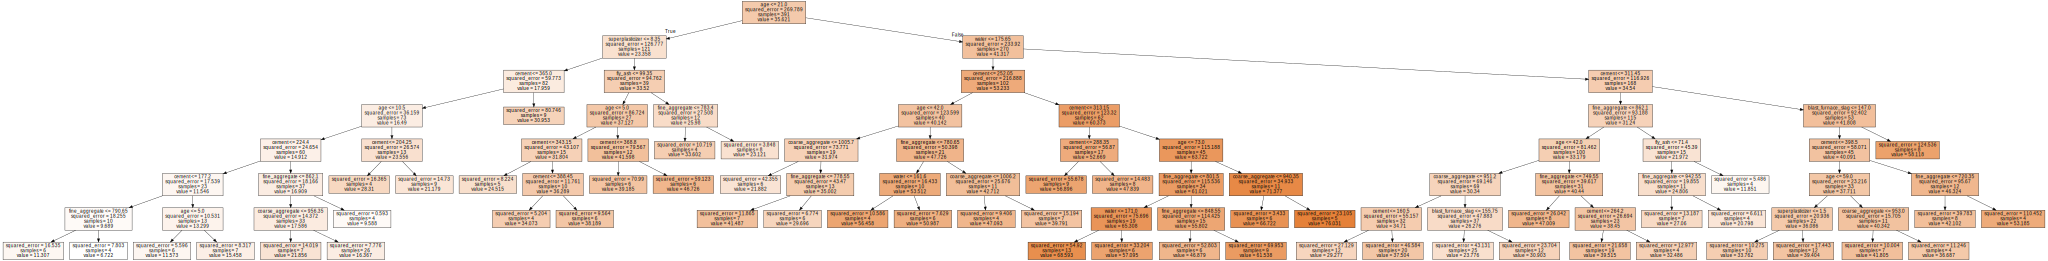

In [54]:
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

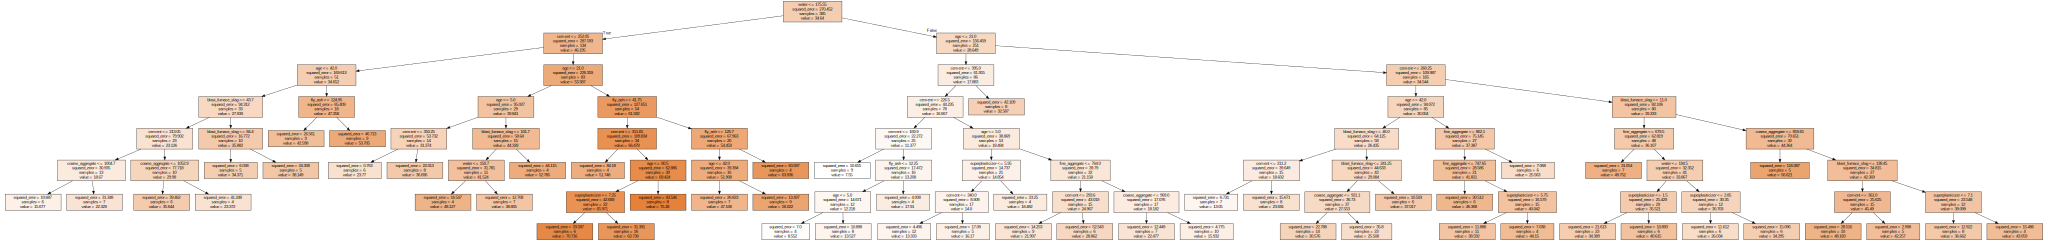

In [55]:
export_graphviz(rf_final.estimators_[1], out_file = "rfr_final_1.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

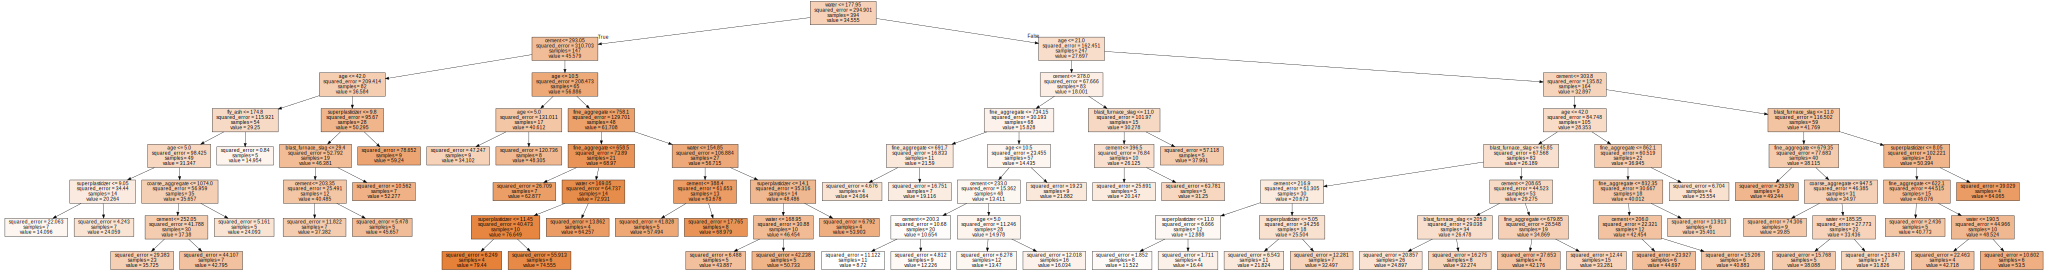

In [56]:
export_graphviz(rf_final.estimators_[10], out_file = "rfr_final_10.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Text(0, 0.5, '변수')

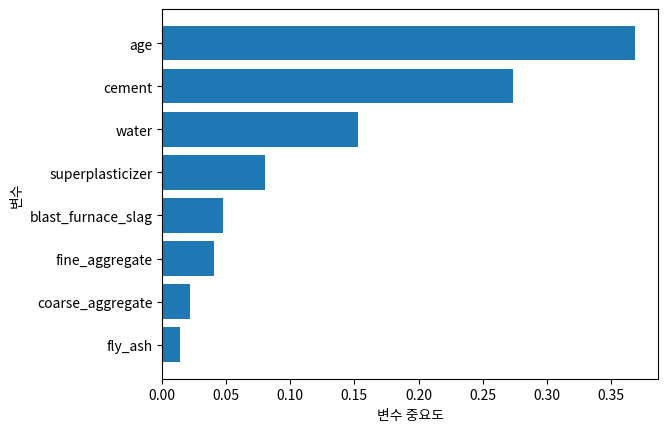

In [57]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))

plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
# 중요 설명변수 : Age,cement,water순으로 영향이 크다고 해석할 수 있다.
# decision tree의 분석 결과와 어느정도 비슷하기 때문에 어느 정도 분석은 잘 된거 같다..